In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Combined Data.csv')

In [3]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [16]:
status_count = df["status"].value_counts().sort_index()

<Axes: xlabel='status'>

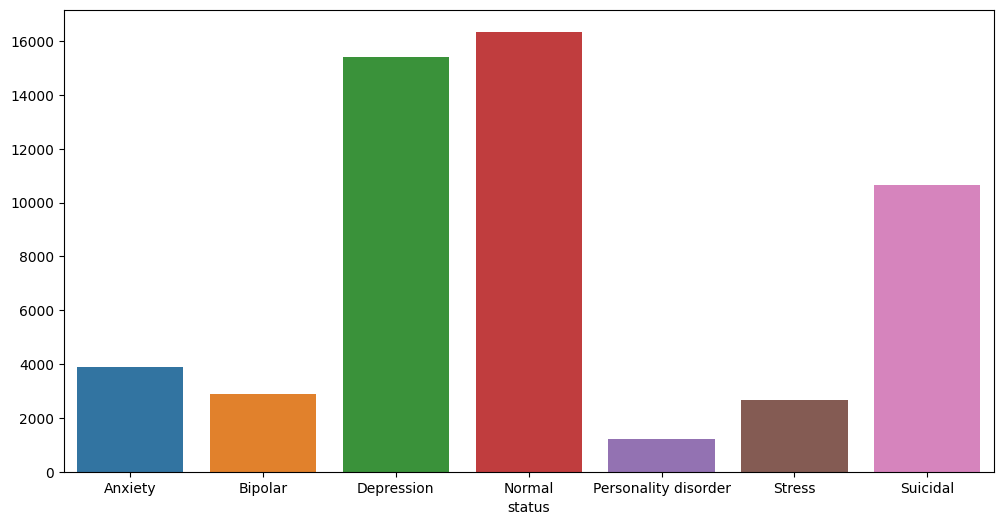

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=status_count.index,y=status_count.values,hue=status_count.index)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     53043 non-null  object
dtypes: object(2)
memory usage: 828.9+ KB


In [154]:
df.dropna(inplace=True)

In [156]:
df["status"].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [158]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snehj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snehj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [159]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [160]:
import re
import string

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    return text

df["statement"] = df["statement"].apply(preprocess_text)

In [161]:
df["statement"].head()

0                                           oh my gosh
1    trouble sleeping confused mind restless heart ...
2    all wrong back off dear forward doubt stay in ...
3    ive shifted my focus to something else but im ...
4    im restless and restless its been a month now ...
Name: statement, dtype: object

In [162]:
# Remove stopwords and applying lemmatization

from nltk.tokenize import word_tokenize

def remove_stopwords_and_lemmatize(text):
    word_token = word_tokenize(text)
    text = [lemmatizer.lemmatize(word,pos="v") for word in word_token if word not in stop_words]
    text = ' '.join(text)
    return text

df["statement"] = df["statement"].apply(remove_stopwords_and_lemmatize)

In [163]:
df["statement"].head()

0                                              oh gosh
1       trouble sleep confuse mind restless heart tune
2    wrong back dear forward doubt stay restless re...
3        ive shift focus something else im still worry
4                  im restless restless month boy mean
Name: statement, dtype: object

In [182]:
# Data Augmentation

from textblob import TextBlob
def augment_text(text):
    try:
        blob = TextBlob(text)
        translated = blob.translate(to='fr').translate(to='en')
        return str(translated)
    except Exception as e:
        return text

df['augmented_statement'] = df['statement'].apply(augment_text)
augmented_df = df[['statement', 'status']].copy()
augmented_df['statement'] = df['augmented_statement']
df = pd.concat([df, augmented_df])

In [202]:
df.head(100)

,statement,status,augmented_statement
0,oh gosh,0,oh gosh
1,trouble sleep confuse mind restless heart tune,0,trouble sleep confuse mind restless heart tune
2,wrong back dear forward doubt stay restless re...,0,wrong back dear forward doubt stay restless re...
3,ive shift focus something else im still worry,0,ive shift focus something else im still worry
4,im restless restless month boy mean,0,im restless restless month boy mean
...,...,...,...
95,restless due imagine long high lazy sleep,0,restless due imagine long high lazy sleep
96,like somethings somethings weird dont know fee...,0,like somethings somethings weird dont know fee...
97,regret grudgesangry things pass worry much fut...,0,regret grudgesangry things pass worry much fut...
98,gods sake im tire worry,0,gods sake im tire worry


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105362 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   statement            105362 non-null  object
 1   status               105362 non-null  int32 
 2   augmented_statement  52681 non-null   object
dtypes: int32(1), object(2)
memory usage: 2.8+ MB


In [185]:
df["statement"] = df["statement"].apply(preprocess_text)
df["statement"] = df["statement"].apply(remove_stopwords_and_lemmatize)

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["status"] = le.fit_transform(df["status"])

In [188]:
df["status"].value_counts()

status
3    32686
2    30808
6    21304
0     7682
1     5554
5     5174
4     2154
Name: count, dtype: int64

In [189]:
# Splitting the data
X = df['statement']
y = df['status']

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
X_train.shape, X_test.shape

((84289,), (21073,))

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

X_train_tf_idf = tf.fit_transform(X_train)
X_test_tf_idf = tf.transform(X_test)

In [193]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,C=1)
model.fit(X_train_tf_idf, y_train)

LogisticRegression(C=1, max_iter=1000)

In [194]:
model.score(X_test_tf_idf, y_test)

0.8059127793859441

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [195]:
y_pred = model.predict(X_test_tf_idf)
y_pred

array([6, 3, 5, ..., 5, 6, 2], dtype=int64)

In [196]:
accuracy_score(y_test, y_pred)

0.8059127793859441

In [197]:
confusion_matrix(y_test, y_pred)

array([[1258,    7,  113,  104,    6,   19,   16],
       [  29,  820,  147,   73,    2,   15,   23],
       [  98,   39, 4835,  244,   12,   32,  944],
       [  14,    5,  105, 6247,    2,   48,   84],
       [   8,    5,  106,   58,  224,   13,   10],
       [  92,   10,  161,  160,    2,  611,   44],
       [   7,    8,  919,  295,    0,   11, 2988]], dtype=int64)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1523
           1       0.92      0.74      0.82      1109
           2       0.76      0.78      0.77      6204
           3       0.87      0.96      0.91      6505
           4       0.90      0.53      0.67       424
           5       0.82      0.57      0.67      1080
           6       0.73      0.71      0.72      4228

    accuracy                           0.81     21073
   macro avg       0.83      0.73      0.77     21073
weighted avg       0.81      0.81      0.80     21073



In [199]:
model.predict(tf.transform(["The sky is blue"]))

array([3], dtype=int64)

In [200]:
y_train_pred = model.predict(X_train_tf_idf)

In [201]:
print("Training Accuracy: ", accuracy_score(y_train, y_train_pred))

Training Accuracy:  0.8519617031878418
